# SVM using Scikit-Learn

The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

Linear Kernel: A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.


In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report as cr


In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [3]:
# We unpickle all the batch files given using unpickle function
dict1=unpickle('data_batch_1')
dict2=unpickle('data_batch_2')
dict3=unpickle('data_batch_3')
dict4=unpickle('data_batch_4')
dict5=unpickle('data_batch_5')
# dict1


In [4]:
#Append all the data into list 'x1'
x1=dict1[b'data']
x1=np.append(x1,dict2[b'data'],axis=0)
x1=np.append(x1,dict3[b'data'],axis=0)
x1=np.append(x1,dict4[b'data'],axis=0)
x1=np.append(x1,dict5[b'data'],axis=0)                     
print(x1.shape)


(50000, 3072)


In [5]:
#Append all the label data into the list 'y1'
y1=dict1[b'labels']
y1=np.append(y1,dict2[b'labels'],axis=0)
y1=np.append(y1,dict3[b'labels'],axis=0)
y1=np.append(y1,dict4[b'labels'],axis=0)
y1=np.append(y1,dict5[b'labels'],axis=0)

print(y1.shape)


(50000,)


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3,random_state=109)

In [8]:
X_test.shape

(15000, 3072)

In [9]:
X_train

array([[244, 241, 241, ..., 245, 247, 248],
       [100,  93,  87, ...,  37,  39,  47],
       [118, 125, 117, ..., 129, 145, 147],
       ...,
       [237, 235, 236, ..., 241, 241, 242],
       [ 36,  22,  40, ...,  71,  89,  83],
       [215, 212, 212, ..., 192, 192, 198]], dtype=uint8)

# We train our training data on various values of C and alpha and then test it on our validation set

In [10]:
alpha_value=[]
# Various c values.. alpha =len(training_data)(no if samples)/c
Diff_values_of_C = [0.0001,0.2,1,1.5,7.5,10,55]
for i in Diff_values_of_C:
    alpha_value.append(len(X_train)/i)

In [16]:
def better_C_value(X_train,y_train,X_test,y_test,alpha_value):
    better_accuracy=[]
    for i in alpha_value:
        clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3,alpha=i)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        acc_s=accuracy_score(y_pred,y_test)
        better_accuracy.append(acc_s)
    return better_accuracy

In [17]:

better_accuracy=better_C_value(X_train,y_train,X_test,y_test,alpha_value)
print(better_accuracy)

[0.1002, 0.3328, 0.37046666666666667, 0.3666, 0.372, 0.3900666666666667, 0.26213333333333333]


# Now considering the best value of alpha we run our SVM algorithm on our test data to find the accuracy. As we find the best accuracy when c=10, we will run our test data on C=10 with coressponding value of alpha. We also see that if we further increase the value of C, accuracy goes down as it falls in trap of overfitting!

In [18]:
test_data_dict=unpickle('test_batch')

In [19]:
final_test_data=test_data_dict[b'data']
final_test_label=test_data_dict[b'labels']

# Accuracy on test data

In [20]:
clf = linear_model.SGDClassifier(max_iter=180,tol=1e-3,alpha=len(X_train)/10)
clf.fit(X_train,y_train)
y_pred2=clf.predict(final_test_data)
print(accuracy_score(y_pred2,final_test_label))

0.387


# Confusion Matrix

The Confusion Matrix for linear SVM with C=10


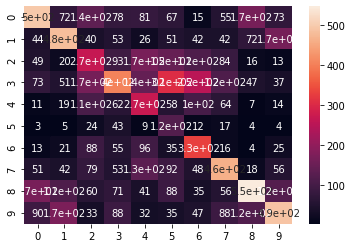

In [23]:
print('The Confusion Matrix for linear SVM with C=10')
import seaborn as sns
import matplotlib.pyplot as plt     
cm1=confusion_matrix(y_pred2,final_test_label)
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax); 

# Classification Report

In [24]:
print(cr(y_pred2 ,final_test_label))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44      1241
           1       0.48      0.47      0.48      1018
           2       0.27      0.27      0.27       972
           3       0.40      0.25      0.31      1597
           4       0.27      0.38      0.31       715
           5       0.12      0.50      0.19       242
           6       0.33      0.48      0.39       684
           7       0.46      0.45      0.46      1033
           8       0.55      0.42      0.47      1303
           9       0.49      0.41      0.45      1195

    accuracy                           0.39     10000
   macro avg       0.39      0.40      0.38     10000
weighted avg       0.42      0.39      0.40     10000



# Comparision with knn algorithm coded from scratch

In [26]:
pixel=pd.DataFrame(X_train).to_numpy()
label=pd.DataFrame(y_train).to_numpy()
test_pixel=pd.DataFrame(X_test).to_numpy()
test_label=pd.DataFrame(y_test).to_numpy()

label_list=[]
for i in range(len(final_test_label)):
    lb=test_label[i]
    label_list.append(lb)
        
    
list2=[]
for i in range(len(final_test_label)):
    list1=[]
    neighbors = []
    m=test_pixel[i]
    for j in range(len(X_train)):
        l=pixel[j]
        q=label[j]
        distance = np.linalg.norm(l-m)
        list1.append((q,distance))
        
    list1.sort(key=lambda ele:ele[1])
    k=5
    for p in range(k):
        neighbors.append(list1[p][0])

    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count) 
    list2.append(prediction)  
print (accuracy_score(label_list, list2))   
    

0.3265


# Finding

We have reported the accuracy for linear svm with C=10 and knn with K=5 and have found SVM did a slight better job than knn.

Accuracy with Linear SVM and C=10 = 0.387
Accuracy with Knn with K=5 and distance metrices = Euclidean = 0.3265


# Lets try to optimize the SVM with some kind of preprocessing